In [51]:
import numpy as np
import matplotlib.pyplot as plt
from inference.gp import GpRegressor
from inference.gp import RationalQuadratic, SquaredExponential, WhiteNoise

Gather the data

In [52]:
data = np.genfromtxt("data/step_results.csv", delimiter=",", names=True)

Train the GP model

In [53]:
training_points = [(tau, eta) for tau, eta in zip(data["tau_bzs"], data["eta_TES"])]
GP = GpRegressor(training_points, data["I_stkg"], kernel=SquaredExponential)
# @Samuele, what kernel did you use in Matlab?

Sample space for plotting

In [54]:
N_tau = 100
N_eta = 100
tau_refined = np.linspace(0, data["tau_bzs"].max(), num=N_tau)
eta_TES_refined = np.linspace(0, data["eta_TES"].max(), num=N_eta)
XX, YY = np.meshgrid(tau_refined, eta_TES_refined)
grid = XX, YY
# gp_coords = [(tau, eta) for tau in tau_refined for eta in eta_TES_refined]
gp_coords = np.append(grid[0].reshape(-1,1), grid[1].reshape(-1,1),axis=1)
mu, sig = GP(gp_coords)

Plot

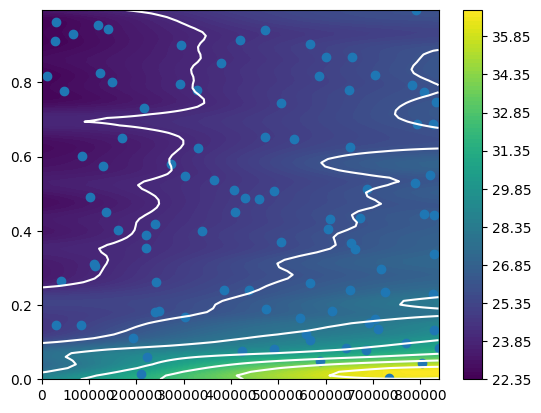

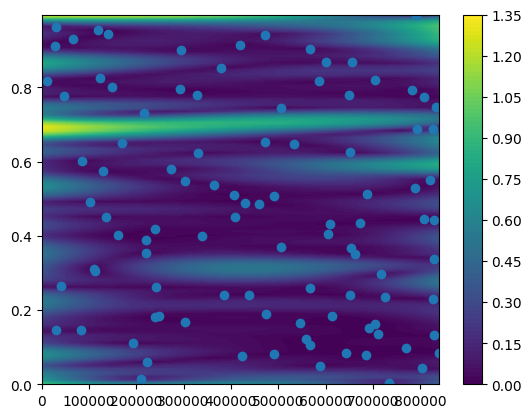

In [55]:
plt.figure()

CF = plt.contourf(XX, YY, mu.reshape([N_tau, N_eta]), levels=100)
plt.contour(XX, YY, mu.reshape([N_tau, N_eta]), levels=8, colors="white")

plt.scatter(data["tau_bzs"], data["eta_TES"])
plt.colorbar(CF)

plt.figure()

CF = plt.contourf(XX, YY, sig.reshape([N_tau, N_eta]), levels=100)

plt.scatter(data["tau_bzs"], data["eta_TES"])
plt.colorbar(CF)
plt.show()
